In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import seaborn as sns
import datetime


In [2]:
from datetime import datetime

In [3]:
# lEAD TIME DATA FILE
leadtime_df = pd.read_excel("data_weekly.xlsx")

In [4]:
leadtime_df

,Tour,Store,ShipDate,Total
0,86.0,103,02-01-1997 - 08-01-1997,490.00
1,86.0,103,09-01-1997 - 15-01-1997,1869.28
2,86.0,103,23-01-1997 - 29-01-1997,2887.68
3,86.0,103,30-01-1997 - 05-02-1997,373.04
4,86.0,103,06-02-1997 - 12-02-1997,1022.90
...,...,...,...,...
2036,NaN,588,17-07-1997 - 23-07-1997,850.00
2037,NaN,588,24-07-1997 - 30-07-1997,10127.40
2038,NaN,588,31-07-1997 - 06-08-1997,5564.00
2039,NaN,588,07-08-1997 - 13-08-1997,1044.35


In [5]:
leadtime_df["ship_start"] = ""
leadtime_df["ship_end"] = ""

In [6]:
for i,v in leadtime_df.iterrows():
    leadtime_df["ship_start"][i]=leadtime_df["ShipDate"][i][0:10]
    leadtime_df["ship_end"][i] = leadtime_df["ShipDate"][i][12:]

<ipython-input-6-1327ee7214b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leadtime_df["ship_start"][i]=leadtime_df["ShipDate"][i][0:10]
<ipython-input-6-1327ee7214b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leadtime_df["ship_end"][i] = leadtime_df["ShipDate"][i][12:]


In [7]:
leadtime_df["leadtime"] = ""

In [8]:
for i, v in leadtime_df.iterrows():
    leadtime_df["leadtime"][i]= (int(np.random.normal(16,3,1)[0]))

<ipython-input-8-0b30d70579c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leadtime_df["leadtime"][i]= (int(np.random.normal(16,3,1)[0]))


In [9]:
leadtime_df

,Tour,Store,ShipDate,Total,ship_start,ship_end,leadtime
0,86.0,103,02-01-1997 - 08-01-1997,490.00,02-01-1997,08-01-1997,17
1,86.0,103,09-01-1997 - 15-01-1997,1869.28,09-01-1997,15-01-1997,16
2,86.0,103,23-01-1997 - 29-01-1997,2887.68,23-01-1997,29-01-1997,13
3,86.0,103,30-01-1997 - 05-02-1997,373.04,30-01-1997,05-02-1997,13
4,86.0,103,06-02-1997 - 12-02-1997,1022.90,06-02-1997,12-02-1997,18
...,...,...,...,...,...,...,...
2036,NaN,588,17-07-1997 - 23-07-1997,850.00,17-07-1997,23-07-1997,13
2037,NaN,588,24-07-1997 - 30-07-1997,10127.40,24-07-1997,30-07-1997,17
2038,NaN,588,31-07-1997 - 06-08-1997,5564.00,31-07-1997,06-08-1997,16
2039,NaN,588,07-08-1997 - 13-08-1997,1044.35,07-08-1997,13-08-1997,12


(array([  5.,  19.,  77., 237., 430., 781., 306., 131.,  44.,  11.]),
 array([ 4. ,  6.2,  8.4, 10.6, 12.8, 15. , 17.2, 19.4, 21.6, 23.8, 26. ]),
 <BarContainer object of 10 artists>)

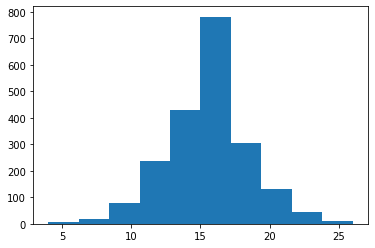

In [10]:
plt.hist(leadtime_df["leadtime"])

In [11]:
leadtime_df["shipend2"] = ""

In [ ]:
leadtime_df

In [15]:
a=np.mean(leadtime_df["leadtime"])
a

15.439980401763842

In [20]:
from scipy.stats import poisson
mu=a

In [21]:
mean, var, skew, kurt = poisson.stats(mu,moments='mvsk')

In [23]:
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
#ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
#ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

In [35]:
poisson_act= poisson.rvs(mu, size=len(leadtime_df["leadtime"]))

In [36]:
from scipy.stats import t
rv = t(df=100-2)

In [37]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(poisson_act,leadtime_df["leadtime"])

In [ ]:
from scipy.stats import poisson
mean, var, skew, kurt = poisson.stats(mu,moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),poisson.ppf(0.99, mu))
poisson_act= poisson.rvs(mu, size=len(leadtime_df["leadtime"]))
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(poisson_act,leadtime_df["leadtime"])

In [38]:
p_value

0.7396074821534913

### Parameter estimation for suitable distributions

In [22]:
leadtime = np.array(leadtime_df.leadtime, dtype=float)
# Normal Distribution
u,s=ss.norm.fit(leadtime)
print(f"The maximum Likelyhood estimators for Normal Distribution are: mean is \
{round(u,3)} and std is {round(s,3)}")

# Gamma Distribution
x,y,z=ss.gamma.fit(leadtime)
print("The maximum Likelyhood estimators for Gamma Distribution are ",\
      {round(x,3),round(y,3),round(z,3)})

# Triangular Distribution
a,b,c=ss.triang.fit(leadtime)
print("The maximum Likelyhood estimators for Triangular Distribution are ",\
      {round(a,3),round(b,3),round(c,3)})

# Exponrntial Distribution
m,n =ss.expon.fit(leadtime)
print(f"The maximum Likelyhood estimators for Uniform Distribution are: mean is \
{round(m,3)} and std is {round(n,3)}")

The maximum Likelyhood estimators for Normal Distribution are: mean is 15.618 and std is 3.021
The maximum Likelyhood estimators for Gamma Distribution are  {0.073, -109.781, 1719.415}
The maximum Likelyhood estimators for Triangular Distribution are  {0.524, 4.982, 21.034}
The maximum Likelyhood estimators for Uniform Distribution are: mean is 5.0 and std is 10.618


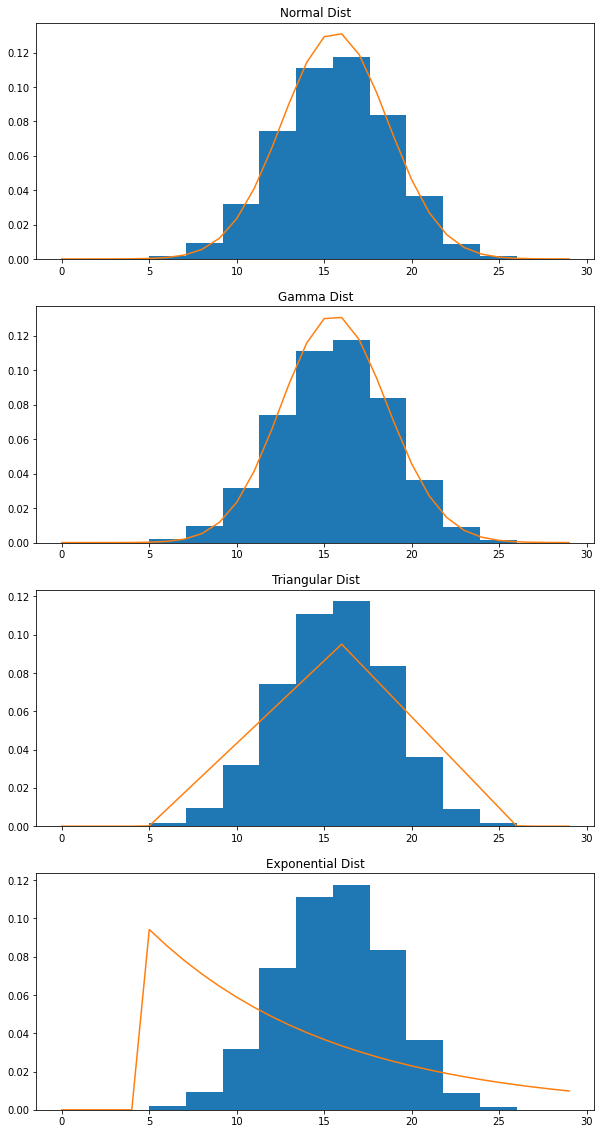

In [23]:
# Plotting Hypothesied Probable distributions over demand data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10,20))

ax1.hist(leadtime,density=True,bins=10)
x_seq = np.arange(0,30,1)
y_seq = ss.norm.pdf(x_seq,u,s)
ax1.plot(x_seq, y_seq)
ax1.title.set_text('Normal Dist')

ax2.hist(leadtime,density=True,bins=10)
x1_seq = np.arange(0,30,1)
y1_seq = ss.gamma.pdf(x1_seq,x,y,z)
ax2.plot(x1_seq, y1_seq)
ax2.title.set_text('Gamma Dist')

ax3.hist(leadtime,density=True,bins=10)
x2_seq = np.arange(0,30,1)
y2_seq = ss.triang.pdf(x2_seq,a,b,c)
ax3.plot(x2_seq, y2_seq)
ax3.title.set_text('Triangular Dist')

ax4.hist(leadtime,density=True,bins=10)
x3_seq = np.arange(0,30,1)
y3_seq = ss.expon.pdf(x1_seq,m,n)
ax4.plot(x3_seq, y3_seq)
ax4.title.set_text('Exponential Dist')

In [24]:
u,s= ss.norm.fit(leadtime)
normal_estimate = ss.norm(u,s)
statistics, pvalue = ss.kstest(rvs = leadtime, cdf = normal_estimate.cdf)
print(f"The p-value for the K-S test for normal distribution is {round(pvalue, 3)}.")

The p-value for the K-S test for normal distribution is 0.0.


In [27]:
print(f"The statistics for the K-S test for normal distribution is {round(statistics, 3)}.")

The statistics for the K-S test for normal distribution is 0.075.


In [26]:
u,s,m= ss.gamma.fit(leadtime)
gamma_estimate = ss.gamma(u,s,m)
statistics, pvalue = ss.kstest(rvs = leadtime, cdf = gamma_estimate.cdf)
print(f"The p-value for the K-S test was for gamma distribution is {round(pvalue, 4)}.")

The p-value for the K-S test was for gamma distribution is 0.0.


### Poisson

In [ ]:
import scipy

In [ ]:
def loss_function(params, data_in):
    mu = params[0]
    loss = 0
    for i in range(len(data_in)):
        loglikelihood = scipy.stats.poisson.logpmf(data_in[i], mu)
        loss_to_add = -loglikelihood
        loss += loss_to_add
    return(loss)



params0 = np.array([20])
minimum = scipy.optimize.fmin(loss_function, params0, args=(leadtime,))
mu_fit = minimum[0]
print("mu_fit")
print(mu_fit)

x = list(range(int(np.min(leadtime)), int(np.max(leadtime))+1))
plt.hist(leadtime, density=True)
plt.scatter(x, scipy.stats.poisson.pmf(x, mu_fit),color="red")
plt.xlabel("Number of Customers (per day)")
plt.ylabel("Probability")
plt.show()

In [ ]:
from scipy import stats


In [ ]:
ks_statistic, p_value = stats.kstest(leadtime, 'poisson', args=(mu_fit,0))
print(ks_statistic, p_value)

In [ ]:
f_expected = ss.poisson.rvs(mu=mu_fit, size=len(leadtime))
stats.chisquare(f_obs=leadtime, f_exp=f_expected)

In [ ]:
len(leadtime)

In [ ]:
leadtime[0]

#### Demand

In [43]:
demand = pd.read_csv("demand_data.csv")

In [29]:
demand.max()

Demand    2140.446
dtype: float64

(array([ 4., 10., 20., 13., 14., 22., 30., 33., 29., 13.]),
 array([ 187.    ,  382.3446,  577.6892,  773.0338,  968.3784, 1163.723 ,
        1359.0676, 1554.4122, 1749.7568, 1945.1014, 2140.446 ]),
 <BarContainer object of 10 artists>)

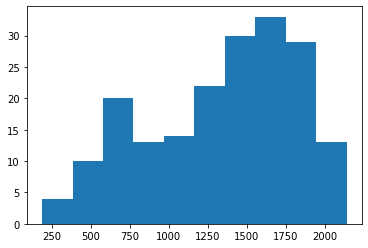

In [30]:
plt.hist(demand)

In [31]:


# Gamma Distribution
x,y,z=ss.gamma.fit(demand.Demand)
print("The maximum Likelyhood estimators for Gamma Distribution are ",\
      {round(x,3),round(y,3),round(z,3)})

# Triangular Distribution
a,b,c=ss.triang.fit(demand.Demand)
print("The maximum Likelyhood estimators for Triangular Distribution are ",\
      {round(a,3),round(b,3),round(c,3)})

# Exponrntial Distribution
m,n =ss.expon.fit(demand.Demand)
print(f"The maximum Likelyhood estimators for Uniform Distribution are: mean is \
{round(m,3)} and std is {round(n,3)}")




# Normal Distribution
u,s=ss.norm.fit(demand.Demand)
print(f"The maximum Likelyhood estimators for Normal Distribution are: mean is \
{round(u,3)} and std is {round(s,3)}")

The maximum Likelyhood estimators for Normal Distribution are: mean is 1343.688 and std is 477.865
The maximum Likelyhood estimators for Gamma Distribution are  {29.153, 275.49, -6691.808}
The maximum Likelyhood estimators for Triangular Distribution are  {0.758, 2128.653, 100.836}
The maximum Likelyhood estimators for Uniform Distribution are: mean is 187.0 and std is 1156.688


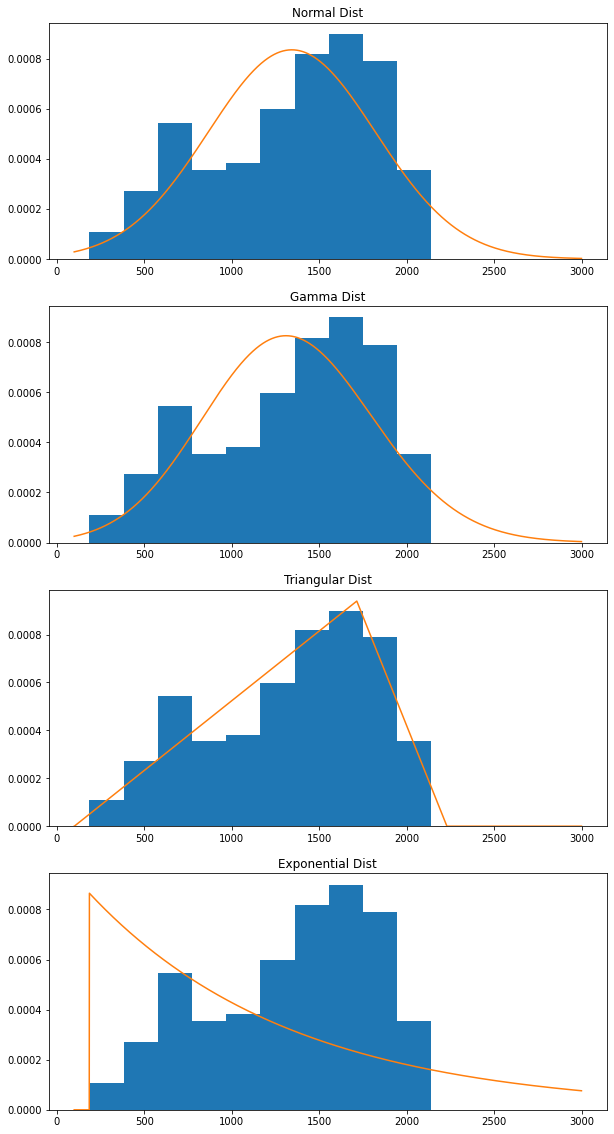

In [32]:
# Plotting Hypothesied Probable distributions over demand data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10,20))

ax1.hist(demand.Demand,density=True,bins=10)
x_seq = np.arange(100,3000,1)
y_seq = ss.norm.pdf(x_seq,u,s)
ax1.plot(x_seq, y_seq)
ax1.title.set_text('Normal Dist')

ax2.hist(demand.Demand,density=True,bins=10)
x1_seq = np.arange(100,3000,1)
y1_seq = ss.gamma.pdf(x1_seq,x,y,z)
ax2.plot(x1_seq, y1_seq)
ax2.title.set_text('Gamma Dist')

ax3.hist(demand.Demand,density=True,bins=10)
x2_seq = np.arange(100,3000,1)
y2_seq = ss.triang.pdf(x2_seq,a,b,c)
ax3.plot(x2_seq, y2_seq)
ax3.title.set_text('Triangular Dist')

ax4.hist(demand.Demand,density=True,bins=10)
x3_seq = np.arange(100,3000,1)
y3_seq = ss.expon.pdf(x1_seq,m,n)
ax4.plot(x3_seq, y3_seq)
ax4.title.set_text('Exponential Dist')

demand

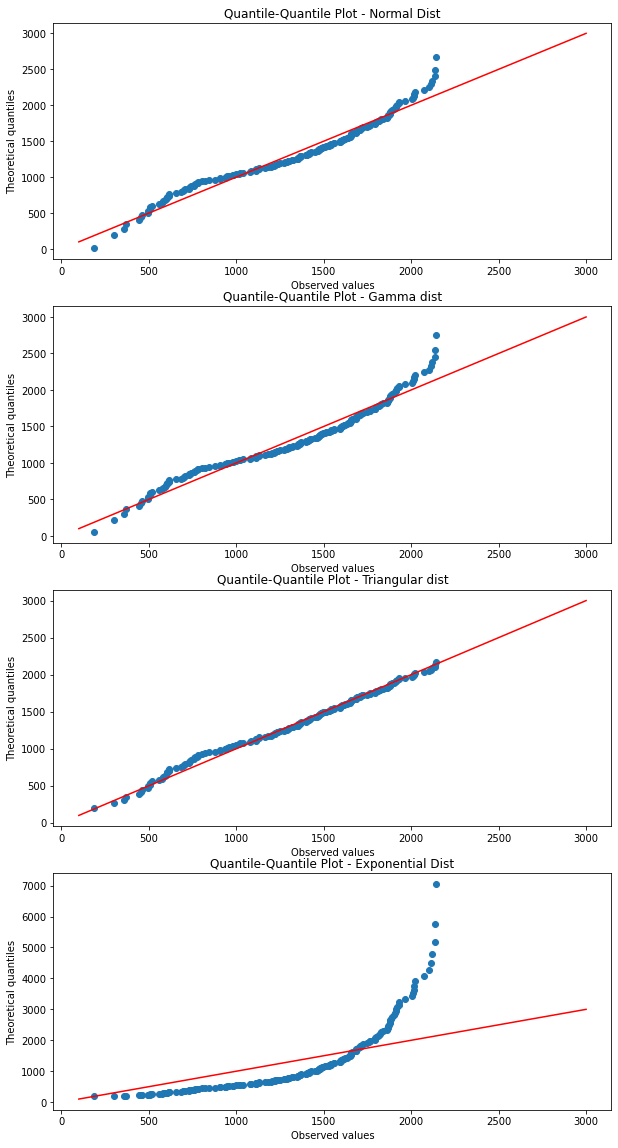

In [33]:

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10,20))

# Normal Distributions
normal_estimate = ss.norm(u, s)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
normal_quantile = normal_estimate.ppf((np.arange(1,len(demand.Demand)+1)-0.5)/len(demand.Demand))
# Sort the sample data in ascending order
demand.Demand = np.sort(demand.Demand)
ax1.scatter(demand.Demand, normal_quantile)
ax1.set_xlabel('Observed values')
ax1.set_ylabel('Theoretical quantiles')
ax1.set_title('Quantile-Quantile Plot - Normal Dist')
ax1.plot([100,3000], [100,3000], color='red')

# Gamma Distributions
gamma_estimate = ss.gamma(x,y,z)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
gamma_quantile = gamma_estimate.ppf((np.arange(1,len(demand.Demand)+1)-0.5)/len(demand.Demand))
# Sort the sample data in ascending order
demand.Demand = np.sort(demand.Demand)
ax2.scatter(demand.Demand, gamma_quantile)
ax2.set_xlabel('Observed values')
ax2.set_ylabel('Theoretical quantiles')
ax2.set_title('Quantile-Quantile Plot - Gamma dist')
ax2.plot([100,3000], [100,3000], color='red')

# Triangular Distributions
tri_estimate = ss.triang(a,b,c)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
tri_quantile = tri_estimate.ppf((np.arange(1,len(demand.Demand)+1)-0.5)/len(demand.Demand))
# Sort the sample data in ascending order
demand.Demand = np.sort(demand.Demand)
ax3.scatter(demand.Demand, tri_quantile)
ax3.set_xlabel('Observed values')
ax3.set_ylabel('Theoretical quantiles')
ax3.set_title('Quantile-Quantile Plot - Triangular dist')
ax3.plot([100,3000], [100,3000], color='red')

# Exponential Distributions
expon_estimate = ss.expon(m,n)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
expon_quantile = expon_estimate.ppf((np.arange(1,len(demand.Demand)+1)-0.5)/len(demand.Demand))
# Sort the sample data in ascending order
demand.Demand = np.sort(demand.Demand)
ax4.scatter(demand.Demand, expon_quantile)
ax4.set_xlabel('Observed values')
ax4.set_ylabel('Theoretical quantiles')
ax4.set_title('Quantile-Quantile Plot - Exponential Dist')
ax4.plot([100,3000], [100,3000], color='red')
plt.show()

In [43]:
#Performimng K-S test to check if its normal Distribution or not
u,s= ss.norm.fit(demand.Demand)
normal_estimate = ss.norm(u,s)
statistics, pvalue = ss.kstest(rvs = demand.Demand, cdf = normal_estimate.cdf)
print(f"The p-value for the K-S test for normal distribution is {round(pvalue, 4)}.")
print(f"The statistics for the K-S test for normal distribution is {round(statistics, 4)}.")

The p-value for the K-S test for normal distribution is 0.0956.
The statistics for the K-S test for normal distribution is 0.089.


In [44]:
u,s,m= ss.gamma.fit(demand.Demand)
gamma_estimate = ss.gamma(u,s,m)
statistics, pvalue = ss.kstest(rvs =demand.Demand, cdf = gamma_estimate.cdf)
print(f"The p-value for the K-S test was for gamma distribution is {round(pvalue, 4)}.")

The p-value for the K-S test was for gamma distribution is 0.0491.


In [40]:
u,s,m= ss.triang.fit(demand.Demand)
triang_estimate = ss.triang(u,s,m)
statistics, pvalue = ss.kstest(rvs = demand.Demand, cdf = triang_estimate.cdf)
print(f"The p-value for the K-S test was for triangular Distribution is  {round(pvalue, 4)}.")

The p-value for the K-S test was for triangular Distribution is  0.4491.


ks_norm_a = ss.ks_1samp(x = ss.standardize(demand.Demand), cdf = stats.norm.cdf)

In [41]:
u,s= ss.expon.fit(demand.Demand)
expon_estimate = ss.expon(u,s)
statistics, pvalue = ss.kstest(rvs = demand.Demand, cdf = expon_estimate.cdf)
print(f"The p-value for the K-S test was for Exponrential Distribution is {round(pvalue, 4)}.")

The p-value for the K-S test was for Exponrential Distribution is 0.0.


In [80]:
from scipy.stats import exponweib

In [123]:
from scipy.stats import weibull_max

In [124]:
477.865*477.865

228354.958225

In [125]:
(loc, scale) = ss.exponweib.fit_loc_scale(demand.Demand, 1, 1)
print(loc, scale)

865.8235537092896 477.86451650347567


In [126]:
(loc, scale) = weibull_max.fit_loc_scale(demand.Demand, 1, 1)
print(loc, scale)

1343.688070212766 477.8645165034743


In [127]:
weibull_rvs=exponweib.rvs(865.8235537092896,477.86451650347567,size=len(demand.Demand))

In [145]:
weibull_r=weibull_max.rvs(1343.688070212766,477.8645165034743,size=len(demand.Demand))

In [146]:
from scipy.stats import t
rv = t(len(demand.Demand)-2)

In [147]:
weibull_rvs

array([1.00383561, 1.00454209, 1.00423533, 1.00401083, 1.0042575 ,
       1.00389148, 1.00475895, 1.00443165, 1.00453436, 1.00411372,
       1.00395151, 1.00353975, 1.00392797, 1.00402626, 1.00439983,
       1.00363628, 1.00440359, 1.00405621, 1.00413683, 1.0039491 ,
       1.0048375 , 1.00366943, 1.00452924, 1.00469143, 1.00500526,
       1.00418504, 1.00396934, 1.00373908, 1.003726  , 1.00425491,
       1.00382501, 1.00430887, 1.00438315, 1.00415095, 1.0042352 ,
       1.0039799 , 1.00417443, 1.00394867, 1.00415961, 1.00434291,
       1.00482433, 1.00347676, 1.00407739, 1.00420264, 1.00396173,
       1.00395315, 1.00420168, 1.00401983, 1.00420239, 1.00472839,
       1.00416852, 1.00447691, 1.00419679, 1.00412014, 1.00380258,
       1.00416663, 1.00438349, 1.00435187, 1.00365287, 1.00410815,
       1.00430763, 1.00388252, 1.00434889, 1.00484324, 1.00374058,
       1.004735  , 1.00401377, 1.00419304, 1.00427682, 1.00412186,
       1.00440837, 1.00413757, 1.00393478, 1.00393764, 1.00458

In [148]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(weibull_r,demand.Demand)

In [149]:
p_value

5.218745394107994e-81

In [150]:
from scipy.stats import norm

In [151]:
(m, s) = ss.norm.fit_loc_scale(demand.Demand, 1, 1)
print(m, s)

865.8235537092917 477.8645165034743


In [160]:
normal_rvs=norm.rvs(865.8235537092917,477.8645165034743*477.8645165034743,size=len(demand.Demand))

In [161]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(normal_rvs,demand.Demand)

In [162]:
p_value

0.9829435038460287

In [163]:
from scipy.stats import kstest

In [166]:
t_stat, p_value = kstest(demand.Demand,normal_rvs)

In [167]:
p_value

1.005670165027348e-21